In [6]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

import sys
sys.path.insert(0, '/home/bryanb/setigen')
import setigen as stg

sys.path.insert(0, '/home/bryanb/bl-scint-analysis')
import blscint as bls
# from bls import *
import scipy.special

import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%matplotlib inline

In [4]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [4]:
bls.to_galactic('17:47:20.4   -28:23:07')

(0.6667458317635659, -0.036227770843024316)

In [5]:
bls.get_tscint(0, 0, 10)

<Quantity 0.000645 s>

In [92]:
# SGR B2 expected scintillation time
l, b = bls.to_galactic('17:47:20.4   -28:23:07')
t_d = bls.get_tscint(l, b, 8.34)
t_d

<Quantity 1.34 s>

In [7]:
# Strong scintillation scaling with freq and velocity
maser_f = 6.668 # GHz
seti_v = 10 # km/s
t_d * (maser_f / 1)**1.2 * (100 / seti_v)

<Quantity 130.58686857 s>

In [8]:
other_v = 50
t_d * (maser_f / 1)**1.2 * (100 / other_v)

<Quantity 26.11737371 s>

In [9]:
bls.get_fresnel(1, 1)

<Quantity 220015.2974054 cm(1/2)>

In [10]:
bls.scale_tscint(1, 4, 10)

52.78031643091577

In [11]:
maser_f = 6.668 # GHz
v_t = 100 # km/s
bls.scale_tscint(t_d, maser_f, v_t)

<Quantity 13.05868686 s>

In [12]:
bls.get_tscint(120, 0, 1)

<Quantity 1686. s>

In [13]:
bls.get_tscint(120, 0, 2)

<Quantity 280.5 s>

In [14]:
bls.get_tscint(120, 0, 4)

<Quantity 56.35 s>

In [15]:
n = 30
dists = np.linspace(0.1, 25, n)
dists.shape

(30,)

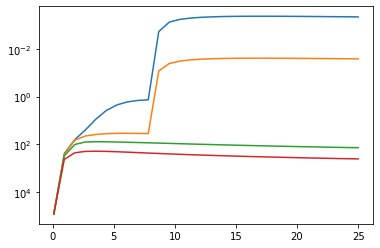

In [16]:
t_ds = np.zeros(n)
for b in [0, 5, 10, 20]:
    for i in range(n):
        t_ds[i] = bls.get_tscint(0, b, dists[i]).value
    plt.plot(dists, t_ds)
plt.yscale('log')
plt.gca().invert_yaxis()
plt.show()

In [55]:
bls.query_ne2001(0, 0, 8.5, field='all')

 #NE2001 input: 4 parameters
    0.0000         l         (deg)                    GalacticLongitude
    0.0000         b         (deg)                    GalacticLatitude
    8.5000         DM/D      (pc-cm^{-3}_or_kpc)      Input_DM_or_Distance
        -1         ndir      1:DM->D;-1:D->DM         Which?(DM_or_D)
 #NE2001 output: 14 values
    8.5000         DIST      (kpc)                    Distance
 1576.9731         DM        (pc-cm^{-3})             ModelDM
    0.0000         DMz       (pc-cm^{-3})             model
0.9919E+06         SM        (kpc-m^{-20/3})          ScatteringMeasure
0.3126E+05         SMtau     (kpc-m^{-20/3})          SM_PulseBroadening
0.1125E+03         SMtheta   (kpc-m^{-20/3})          SM_GalAngularBroadening
0.3481E+08         SMiso     (kpc-m^{-20/3})          SM_IsoplanaticAngle
0.5403E+09         EM        (pc-cm^{-6})             EmissionMeasure_from_SM
0.2317E+07         TAU       (ms)                     PulseBroadening @1GHz
0.7967E-10         S

4.0

In [96]:
c = bls.query_ne2001(0, 0, 9, field='THETA_G')
c

<Quantity 25860. mas>

In [95]:
c = bls.query_ne2001(l, b, 9, field='THETA_G')
c

<Quantity 18100. mas>

In [114]:
l, b, d = 3, 7, 25

sbw = bls.query_ne2001(l, b, d, field='SBW')
tau = bls.query_ne2001(l, b, d, field='TAU')
2*np.pi*(sbw*tau).cgs #C1

<Quantity 1.16018646>

In [83]:
u.Unit('kpc.m(-3)')

Unit("kpc / m3")

In [72]:
c = c.replace('pc-', 'pc.')
c = c.replace('^{', '')
c = c.replace('}', '')
u.Unit(c)

Unit("pc / cm3")

In [127]:
bls.get_tscint(-1, 0, 20, f=6, v=50)

<Quantity 16.35082511 s>

In [128]:
2*3/16

0.375

In [6]:
import scipy.stats as st
class my_pdf(st.rv_continuous):
    def _pdf(self,x):
        return 3*x**2  # Normalized over its range, in this case [0,1]

my_cv = my_pdf(a=0, b=1, name='my_pdf')
my_cv

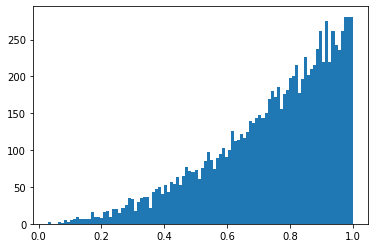

In [21]:
A = my_cv.rvs(size=10000)
plt.hist(A, bins=100)
plt.show()

In [118]:
import scipy.special
t_d = 30
dt = 18.26/2

rho = stg.func_utils.gaussian(dt, 0, t_d/stg.fwhm_factor)

class my_pdf(st.rv_continuous):
    def _pdf(self,x):
        frac = 1/(1-rho)
        exp = np.exp(-(1+x)/(1-rho))
        bes = scipy.special.i0(2*np.sqrt(1*x*rho)/(1-rho))
        return frac*exp*bes/0.36787944117144217

my_cv = my_pdf(a=0, b=100, name='my_pdf')
my_cv

In [123]:
a = my_cv.rvs(size=1000)

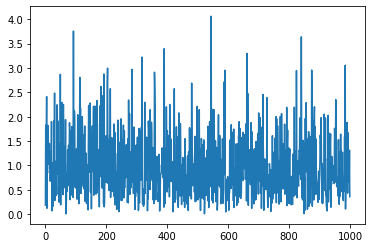

In [124]:
plt.plot(a)
plt.show()

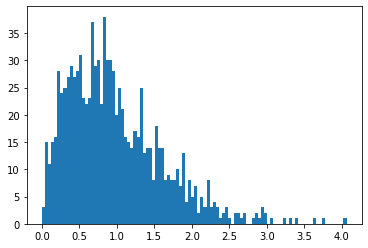

In [125]:
plt.hist(a, bins=100)
plt.show()

In [126]:
from scipy.integrate import quad
quad(my_cv._pdf, 0, 100)

(1.0000000000000002, 8.144950091130344e-13)

In [115]:
x=100
frac = 1/(1-rho)
exp = np.exp(-(1+x)/(1-rho))
bes = scipy.special.i0(2*np.sqrt(1*x*rho)/(1-rho))
frac, exp, bes

(4.415551336925671, 2.076789125539017e-194, 2.4440271019253004e+32)

In [132]:
np.cumprod([1,2,3,4])

array([ 1,  2,  6, 24])

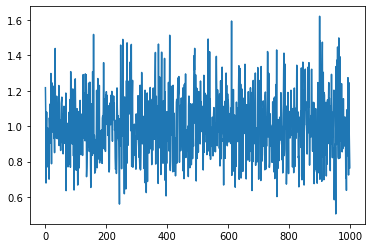

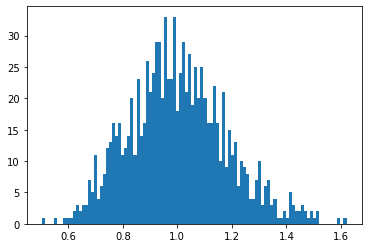

In [152]:
import scipy.special
t_d = 30
dt = 18.26/2/4

rho = stg.func_utils.gaussian(dt, 0, t_d/stg.fwhm_factor)

def scint_pdf(x, last_x=1):
    frac = 1/(1-rho)
    exp = np.exp(-(last_x+x)/(1-rho))
    bes = scipy.special.i0(2*np.sqrt(last_x*x*rho)/(1-rho))
    return frac*exp*bes
    
class my_pdf(st.rv_continuous):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.last_x = 1
        
        # Perform integration in the range we care about
        self.integral, _ = quad(scint_pdf, self.a, self.b, args=(self.last_x,))
        
    def _pdf(self, x):
        return scint_pdf(x, self.last_x)/self.integral

my_cv = my_pdf(a=0, b=10, name='my_pdf')
a = my_cv.rvs(size=1000)
plt.plot(a)
plt.show()
plt.hist(a, bins=100)
plt.show()

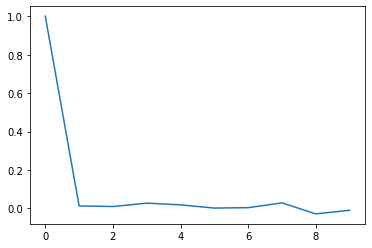

In [156]:
plt.plot(bls.autocorr(a)[:10])
plt.show()

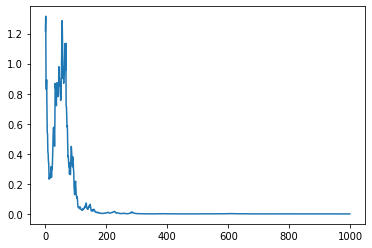

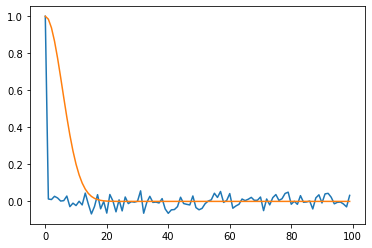

In [164]:
plt.plot(np.cumprod(a))
plt.show()

plt.plot(bls.autocorr((a))[:100])
plt.plot(stg.func_utils.gaussian(dt*np.arange(len(a)), 0, t_d/stg.fwhm_factor)[:100])
plt.show()

In [150]:
quad(my_cv._pdf, 0, 10)

(0.367879441171441, 7.101668666515846e-10)

In [154]:
t_d/dt

13.143483023001094

In [168]:
np.linspace(0, 10, 10+1)[1:]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [177]:
# g1, g2, lag
# gains -> 0 - 10 exclusive, how many bins? 1024
# lag -> 0 - 128

g1s = g2s = np.linspace(0, 10, 64+1)[1:]
lags = np.arange(1, 128+1)
weights = np.zeros((len(lags), len(g1s), len(g2s)))

for i, lag in enumerate(lags):
    rho = stg.func_utils.gaussian(lag*dt, 0, t_d/stg.fwhm_factor)
    for j, g1 in enumerate(g1s):
        for k, g2 in enumerate(g2s):
            frac = 1/(1-rho)
            exp = np.exp(-(g1+g2)/(1-rho))
            bes = scipy.special.i0(2*np.sqrt(g1*g2*rho)/(1-rho))
            weights[i, j, k] = np.nan_to_num(frac*exp*bes)

<ipython-input-177-6089ecdf8176>:16: RuntimeWarning: invalid value encountered in double_scalars
  weights[i, j, k] = np.nan_to_num(frac*exp*bes)


In [189]:
np.digitize(1, g1s, right=True)

6

In [181]:
g1s[6]

1.09375

In [188]:
np.digitize(1, lags, right=True), lags

(0,
 array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128]))

In [197]:
y = 1

ys = np.zeros(64)
for t in range(len(ys)):
    lag = 1
    lag_i = np.digitize(lag, lags, right=True)
    
    p = weights[lag_i, np.digitize(y, g1s, right=True), :]
    p /= np.sum(p)
    
    y = np.random.choice(g2s, 1, p=p)[0]
    ys[t] = y

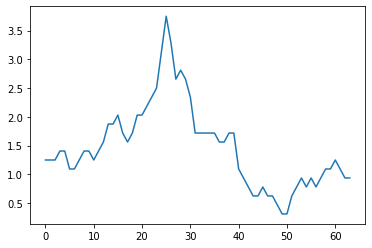

In [199]:
plt.plot(ys)
plt.show()

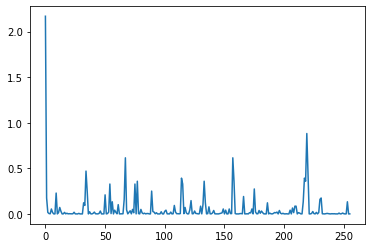

In [316]:
t_d = 30
dt = 18.26/2



# g1s = np.linspace(0, 10, 128+1)[1:]
# # g1s = np.append(g1s,
# #                 np.linspace(4, 10, 16+1)[1:])
# g2s = g1s

g1s = g2s = np.logspace(-4, 1, 128+1)[1:]
lags = np.arange(1, 128+1)
weights = np.zeros((len(lags), len(g1s), len(g2s)))

for i, lag in enumerate(lags):
    rho = stg.func_utils.gaussian(lag*dt, 0, t_d/stg.fwhm_factor)
    for j, g1 in enumerate(g1s):
        for k, g2 in enumerate(g2s):
            frac = 1/(1-rho)
            exp = np.exp(-(g1+g2)/(1-rho))
            bes = scipy.special.i0(2*np.sqrt(g1*g2*rho)/(1-rho))
            weights[i, j, k] = np.nan_to_num(frac*exp*bes)
            
            
y = 1

ys = np.zeros(64*4)
for t in range(len(ys)):
    lag = 1
    lag_i = np.digitize(lag, lags, right=True)
    
    p = weights[lag_i, np.digitize(y, g1s, right=True), :]
    p /= np.sum(p)
    
    y = np.random.choice(g2s, 1, p=p)[0]
    ys[t] = y
    
plt.plot(ys)
plt.show()

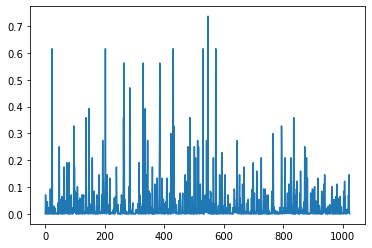

In [328]:
ys = np.zeros(64*16)
for t in range(len(ys)):
    lag = 1
    lag_i = np.digitize(lag, lags, right=True)
    
    p = weights[lag_i, np.digitize(y, g1s, right=True), :]
    p /= np.sum(p)
    
    y = np.random.choice(g2s, 1, p=p)[0]
    ys[t] = y
    
plt.plot(ys)
plt.show()

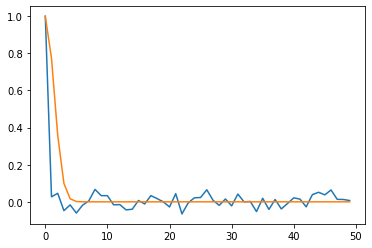

In [329]:
plt.plot(bls.autocorr((ys))[:50])
plt.plot(stg.func_utils.gaussian(dt*np.arange(len(ys)), 0, t_d/stg.fwhm_factor)[:50])
plt.show()

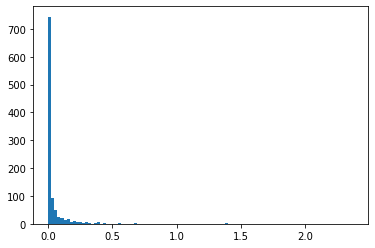

In [319]:
plt.hist(ys, bins=100)
plt.show()

In [330]:
g1s

array([1.09411381e-04, 1.19708503e-04, 1.30974726e-04, 1.43301257e-04,
       1.56787884e-04, 1.71543790e-04, 1.87688429e-04, 2.05352503e-04,
       2.24679009e-04, 2.45824407e-04, 2.68959879e-04, 2.94272718e-04,
       3.21967844e-04, 3.52269465e-04, 3.85422887e-04, 4.21696503e-04,
       4.61383968e-04, 5.04806572e-04, 5.52315842e-04, 6.04296390e-04,
       6.61169026e-04, 7.23394163e-04, 7.91475544e-04, 8.65964323e-04,
       9.47463526e-04, 1.03663293e-03, 1.13419440e-03, 1.24093776e-03,
       1.35772714e-03, 1.48550802e-03, 1.62531484e-03, 1.77827941e-03,
       1.94564006e-03, 2.12875166e-03, 2.32909659e-03, 2.54829675e-03,
       2.78812667e-03, 3.05052789e-03, 3.33762469e-03, 3.65174127e-03,
       3.99542056e-03, 4.37144481e-03, 4.78285814e-03, 5.23299115e-03,
       5.72548788e-03, 6.26433537e-03, 6.85389584e-03, 7.49894209e-03,
       8.20469611e-03, 8.97687132e-03, 9.82171889e-03, 1.07460783e-02,
       1.17574327e-02, 1.28639694e-02, 1.40746466e-02, 1.53992653e-02,
      

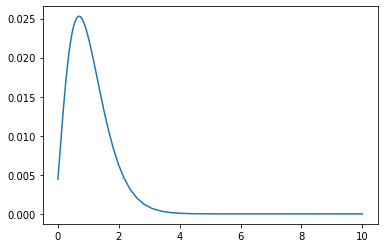

In [332]:
p = weights[0, np.digitize(1, g1s, right=True), :]
p /= np.sum(p)
plt.plot(g1s, p)

In [335]:
g2s

array([1.09411381e-04, 1.19708503e-04, 1.30974726e-04, 1.43301257e-04,
       1.56787884e-04, 1.71543790e-04, 1.87688429e-04, 2.05352503e-04,
       2.24679009e-04, 2.45824407e-04, 2.68959879e-04, 2.94272718e-04,
       3.21967844e-04, 3.52269465e-04, 3.85422887e-04, 4.21696503e-04,
       4.61383968e-04, 5.04806572e-04, 5.52315842e-04, 6.04296390e-04,
       6.61169026e-04, 7.23394163e-04, 7.91475544e-04, 8.65964323e-04,
       9.47463526e-04, 1.03663293e-03, 1.13419440e-03, 1.24093776e-03,
       1.35772714e-03, 1.48550802e-03, 1.62531484e-03, 1.77827941e-03,
       1.94564006e-03, 2.12875166e-03, 2.32909659e-03, 2.54829675e-03,
       2.78812667e-03, 3.05052789e-03, 3.33762469e-03, 3.65174127e-03,
       3.99542056e-03, 4.37144481e-03, 4.78285814e-03, 5.23299115e-03,
       5.72548788e-03, 6.26433537e-03, 6.85389584e-03, 7.49894209e-03,
       8.20469611e-03, 8.97687132e-03, 9.82171889e-03, 1.07460783e-02,
       1.17574327e-02, 1.28639694e-02, 1.40746466e-02, 1.53992653e-02,
      

In [337]:
g2s.shape, p.shape

((128,), (128,))

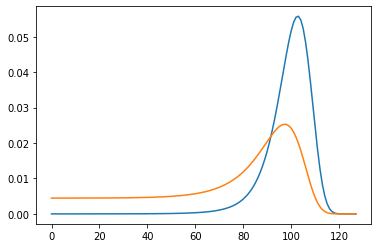

In [350]:
spacing = (g2s-np.append([0], g2s[:-1]))
p_weighted = spacing * p
p_weighted /= np.sum(p_weighted)

plt.plot(p_weighted)
plt.plot(p)

In [349]:
p_weighted.sum()

1.0

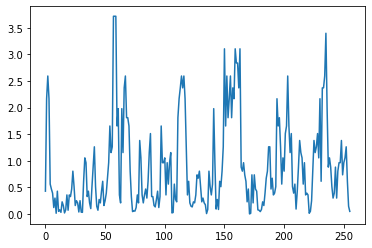

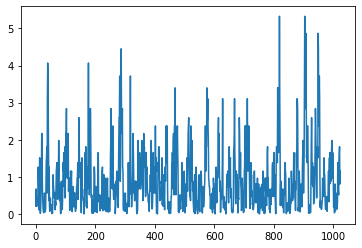

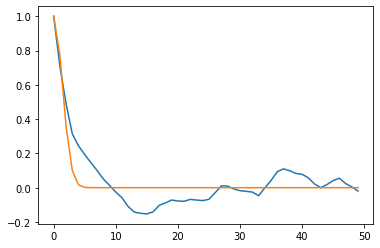

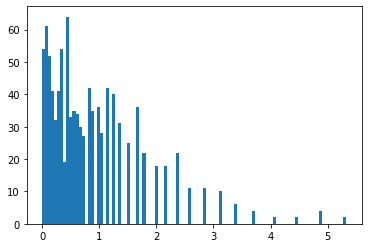

In [351]:
t_d = 30
dt = 18.26/2



# g1s = np.linspace(0, 10, 128+1)[1:]
# # g1s = np.append(g1s,
# #                 np.linspace(4, 10, 16+1)[1:])
# g2s = g1s

g1s = g2s = np.logspace(-4, 1, 128+1)[1:]
lags = np.arange(1, 128+1)
weights = np.zeros((len(lags), len(g1s), len(g2s)))

for i, lag in enumerate(lags):
    rho = stg.func_utils.gaussian(lag*dt, 0, t_d/stg.fwhm_factor)
    for j, g1 in enumerate(g1s):
        for k, g2 in enumerate(g2s):
            frac = 1/(1-rho)
            exp = np.exp(-(g1+g2)/(1-rho))
            bes = scipy.special.i0(2*np.sqrt(g1*g2*rho)/(1-rho))
            weights[i, j, k] = np.nan_to_num(frac*exp*bes)
            
            
y = 1

ys = np.zeros(64*4)
for t in range(len(ys)):
    lag = 1
    lag_i = np.digitize(lag, lags, right=True)
    
    p = weights[lag_i, np.digitize(y, g2s, right=True), :]
    spacing = (g2s-np.append([0], g2s[:-1]))
    p_weighted = spacing * p
    p_weighted /= np.sum(p_weighted)
    
    y = np.random.choice(g2s, 1, p=p_weighted)[0]
    ys[t] = y
    
plt.plot(ys)
plt.show()

ys = np.zeros(64*16)
for t in range(len(ys)):
    lag = 1
    lag_i = np.digitize(lag, lags, right=True)
    
    p = weights[lag_i, np.digitize(y, g2s, right=True), :]
    spacing = (g2s-np.append([0], g2s[:-1]))
    p_weighted = spacing * p
    p_weighted /= np.sum(p_weighted)
    
    y = np.random.choice(g2s, 1, p=p_weighted)[0]
    ys[t] = y
    
plt.plot(ys)
plt.show()

plt.plot(bls.autocorr((ys))[:50])
plt.plot(stg.func_utils.gaussian(dt*np.arange(len(ys)), 0, t_d/stg.fwhm_factor)[:50])
plt.show()

plt.hist(ys, bins=100)
plt.show()

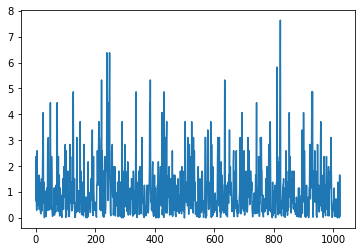

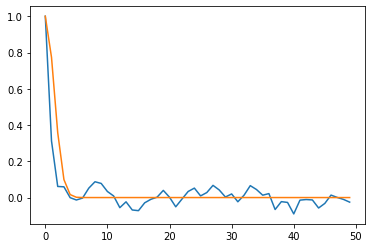

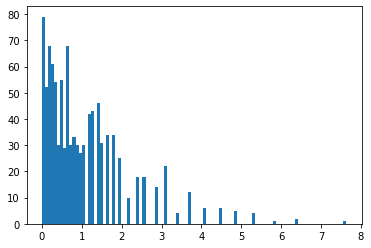

In [364]:
ys = np.zeros(64*16)
for t in range(len(ys)):
    lag = 1
    lag_i = np.digitize(lag, lags, right=True)
    
    p = weights[lag_i, np.digitize(y, g2s, right=True), :]
    spacing = (g2s-np.append([0], g2s[:-1]))
    p_weighted = spacing * p
    p_weighted /= np.sum(p_weighted)
    
    y = np.random.choice(g2s, 1, p=p_weighted)[0]
    ys[t] = y
    
plt.plot(ys)
plt.show()

plt.plot(bls.autocorr((ys))[:50])
plt.plot(stg.func_utils.gaussian(dt*np.arange(len(ys)), 0, t_d/stg.fwhm_factor)[:50])
plt.show()

plt.hist(ys, bins=100)
plt.show()

In [363]:
lags = np.arange(0, 128+1)
np.digitize(1, lags, right=False)

2

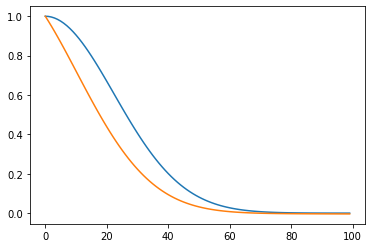

In [375]:
t_d = 30*4*4
dt = 18.26/2

A = stg.func_utils.gaussian(dt*np.arange(len(ys)), 0, t_d/stg.fwhm_factor)

plt.plot(A[:100])
plt.plot(bls.autocorr(A)[:100])

In [12]:
t_d = 30
dt = 18.26/2
# gs=np.logspace(-4, 1, 128+1)[1:]
gs=np.linspace(0, 10, 128*2+1)[1:]
lags=np.arange(1, 128+1)

def get_dist_weights(t_d, dt, gs, lags):
    weights = np.zeros((len(lags), len(gs), len(gs)))
    for i, lag in enumerate(lags):
        rho = stg.func_utils.gaussian(lag*dt, 0, t_d/stg.fwhm_factor)
        for j, g1 in enumerate(gs):
            for k, g2 in enumerate(gs):
                frac = 1/(1-rho)
                exp = np.exp(-(g1+g2)/(1-rho))
                bes = scipy.special.i0(2*np.sqrt(g1*g2*rho)/(1-rho))
                weights[i, j, k] = np.nan_to_num(frac*exp*bes)
    return weights
    
weights = get_dist_weights(t_d=t_d,
                           dt=dt,
                           gs=gs,
                           lags=lags)

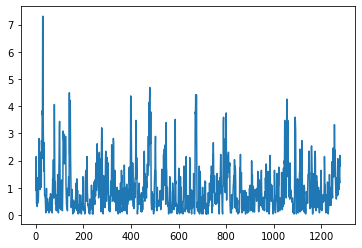

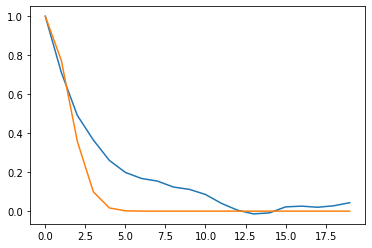

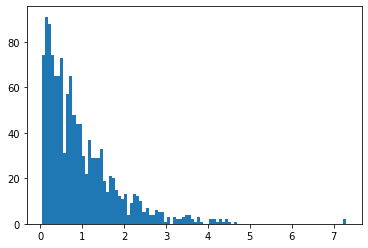

In [20]:
ys = np.zeros(64*2*10)
y=1
for t in range(len(ys)):
    lag = 1
    lag_i = np.digitize(lag, lags, right=True)
    
    p = weights[lag_i, np.digitize(y, gs, right=True), :]
    spacing = (gs-np.append([0], gs[:-1]))
    p_weighted = spacing * p
    p_weighted /= np.sum(p_weighted)
    
    y = np.random.choice(gs, 1, p=p_weighted)[0]
    ys[t] = y
    
plt.plot(ys)
plt.show()

ac_len = 20
plt.plot(bls.autocorr((ys))[:ac_len])
plt.plot(stg.func_utils.gaussian(dt*np.arange(len(ys)), 0, t_d/stg.fwhm_factor)[:ac_len])
plt.show()

plt.hist(ys, bins=100)
plt.show()

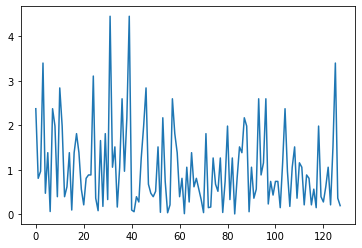

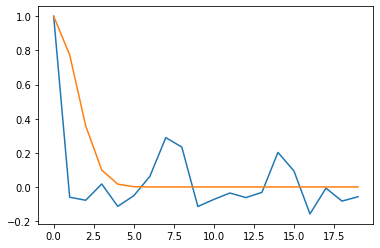

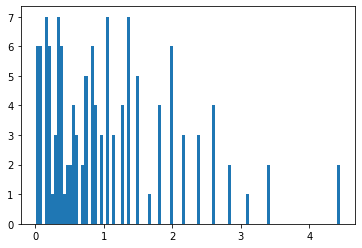

In [557]:
ys = np.zeros(64*2)
y=1
for t in range(len(ys)):
    lag = t+1
    lag_i = np.digitize(lag, lags, right=True)
    
    # Set y=1
    p = weights[lag_i, np.digitize(1, gs, right=True), :]
    spacing = (gs-np.append([0], gs[:-1]))
    p_weighted = spacing * p
    p_weighted /= np.sum(p_weighted)
    
    y = np.random.choice(gs, 1, p=p_weighted)[0]
    ys[t] = y
    
plt.plot(ys)
plt.show()

ac_len = 20
plt.plot(bls.autocorr((ys))[:ac_len])
plt.plot(stg.func_utils.gaussian(dt*np.arange(len(ys)), 0, t_d/stg.fwhm_factor)[:ac_len])
plt.show()

plt.hist(ys, bins=100)
plt.show()

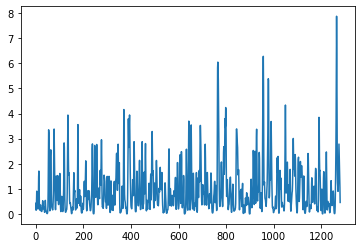

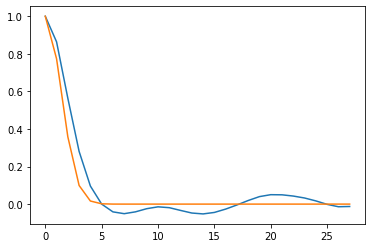

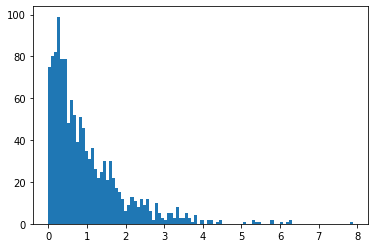

In [582]:
t_d = 30
dt = 18.26/2

frame = stg.Frame(fchans=256,
              tchans=64*2*10,
              df=2.79,
              dt=dt)
# p=100
p = int(np.ceil(t_d/stg.fwhm_factor/dt*10))
rho = bls.get_rho(frame.ts, t_d, p)
Z = bls.build_Z(rho, frame.tchans)
ys = bls.get_Y(Z)

plt.plot(ys)
plt.show()

ac_len = p*2
plt.plot(bls.autocorr((ys))[:ac_len])
plt.plot(stg.func_utils.gaussian(dt*np.arange(len(ys)), 0, t_d/stg.fwhm_factor)[:ac_len])
plt.show()

plt.hist(ys, bins=100)
plt.show()

In [528]:
t_d/stg.fwhm_factor/dt*10

13.95380832893788

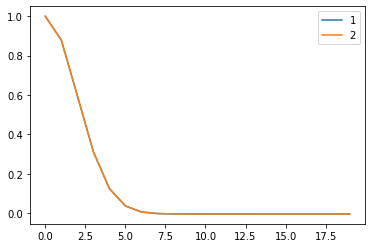

In [472]:
def autocorr1(x, length=20):
    # Returns up to length index shifts for autocorrelations
    return np.array([1]+[np.corrcoef(x[:-i], x[i:])[0, 1]
                         for i in range(1, length)])

def autocorr2(x):
    """
    Calculate full autocorrelation, normalizing time series to zero mean and unit variance.
    """
    ts = (x - np.mean(x)) / np.std(x)
    acf = np.correlate(ts, ts, 'full')[-len(ts):] / len(ts)
    return acf

t_d = 30
dt = 18.26/2

frame = stg.Frame(fchans=256,
              tchans=64*2*10,
              df=2.79,
              dt=dt)
p=20
sigma = t_d / (2 * np.sqrt(2 * np.log(2)))
y = stg.func_utils.gaussian(frame.ts, 
                        (frame.ts[0] + frame.ts[-1]) / 2, 
                        sigma)
plt.plot(autocorr1(y), label='1')
plt.plot(autocorr2(y)[:20], label='2')
plt.legend()
plt.show()